**<h1>Visualizing Global Temperature Anomalies for 2024</h1>**

# Setup

In [5]:
pip install cartopy netcdf4 pyfonts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.7 MB/s eta 0:00:00


In [16]:
# Importing essential libraries for data analysis and visualization
import os
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Importing libraries for geospatial data visualization
import cartopy.crs as ccrs

# Importing additional tools for visualization
from matplotlib import rcParams
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.font_manager import FontProperties

# For working with NetCDF files
from netCDF4 import Dataset

# Importing custom font loader
from pyfonts import load_font

# Ensures inline plotting for Jupyter Notebook
%matplotlib inline

# Load Data

In [7]:
data = Dataset("amaps_2024_vs_19002000.nc")
data

<class 'netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.6
    title: GISTEMP Surface Temperature Analysis: Annual J-D 2024 L-OTI(degC) Anomaly vs 1900-2000
    institution: NASA Goddard Institute for Space Sciences
    source: https://data.giss.nasa.gov/gistemp/
    history: Created 2025-01-10 16:24 EST by amaps_netcdf.cgi 1.3 using parameters GHCNv4_ERSSTv5_1200km_Anom_112_2024_2024_1900_2000_100_180_90_0_2_
    dimensions(sizes): lat(90), lon(180)
    variables(dimensions): float32 lon(lon), float32 lat(lat), float32 TEMPANOMALY(lat, lon)
    groups: 

In [8]:
# Extracting longitude values ranging from -180 to 180 degrees East
lons = data.variables["lon"][:]

# Extracting latitude values ranging from -90 to 90 degrees North
lats = data.variables["lat"][:]

# Extracting temperature anomaly data
temp_anomaly = data.variables["TEMPANOMALY"][:]

# Checking the type of the variable `lons`
type(lons)

numpy.ma.core.MaskedArray

# Plot

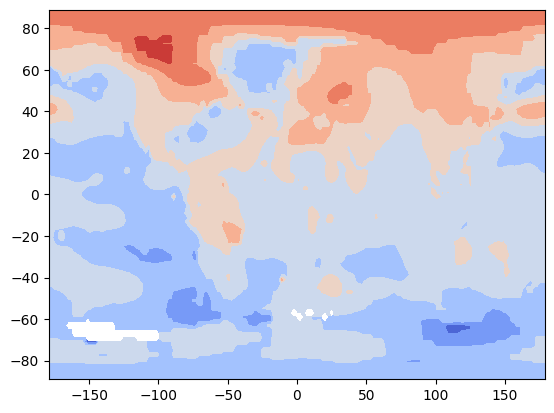

In [10]:
# Plot Temperature Anomaly in PlateCarree Projection
# L-OTI = Land-Ocean Temperature Index
plt.contourf(lons, lats, temp_anomaly, cmap="coolwarm")
plt.show()

1.427601579478423

In [14]:
# Function to plot by https://github.com/hbshrestha/global_temperature_anomaly

def temp_anomaly_plot(projection, projection_name):

    fig = plt.figure(figsize = (12, 6))

    #Add an axes to the current figure and make it the current axes.
    ax = plt.axes(projection = projection)

    #make the map global rather than having it zoom in to extent of the plotted data
    ax.set_global()

    ax.gridlines(linestyle = "--", color = "black")

    #Set contour levels, then draw the plot and a colorbar
    clevs = np.arange(-5, 6)
    cmap = "coolwarm"

    #Plot filled contours
    plt.contourf(lons, lats,
                 temp_anomaly,
                 clevs,
                 transform = ccrs.PlateCarree(),
                 cmap = cmap,
                 extend = "both" #To add arrows on both ends of the colorbar
                )

    #Add coastlines after filling contours
    ax.coastlines(resolution = "110m", lw = 1)

    plt.title(f"2024 L-OTI (°C) vs 1900-2000 mean\n Projection: {projection_name}")

    cb = plt.colorbar(ax = ax,
                      orientation = "horizontal",
                      pad = 0.02,
                      aspect = 20,  #ratio of long to short dimension
                      shrink = 0.5, #Fraction by which to multiply the size of the colorbar
                      ticks = clevs #To get the ticks same as clevs -5 to 5 degree Celsius in colorbar
                     )

    cb.set_label("°C", size = 12, rotation = 0, labelpad = 15)
    cb.ax.tick_params(labelsize = 10)

    plt.show()

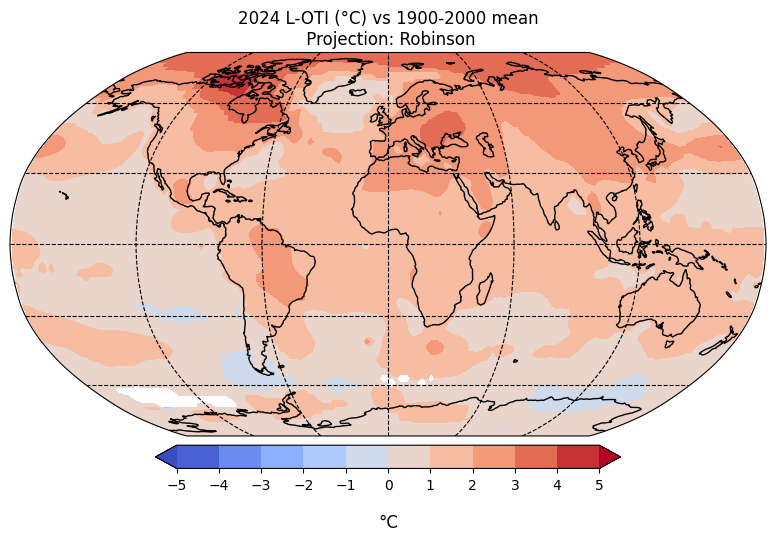

In [15]:
temp_anomaly_plot(projection = ccrs.Robinson(), projection_name = "Robinson")

In [17]:
# Calculate the mean of the temperature anomalies while ignoring NaN values
mean_temp_anomaly = temp_anomaly.mean().item()
mean_temp_anomaly

1.427601579478423

# Final Plot

In [18]:
# Load Merriweather and Lato fonts using pyfonts
title_font_path = "ofl/merriweather/Merriweather-Bold.ttf"
body_font_path = "ofl/lato/Lato-Medium.ttf"
title_font = load_font(font_url=f"https://github.com/google/fonts/blob/main/{title_font_path}?raw=true")
body_font = load_font(font_url=f"https://github.com/google/fonts/blob/main/{body_font_path}?raw=true")

# Function for main plot
def main_plot(ax, projection):
    clevs = np.arange(-5, 6)
    cmap = plt.colormaps["RdBu_r"].copy()
    cmap.set_bad(color="grey")

    temp_anomaly_masked = ma.masked_invalid(temp_anomaly)

    ax.set_global()
    ax.gridlines(linestyle="--", color="grey", alpha=0.25)
    contour = ax.contourf(
        lons, lats,
        temp_anomaly_masked,
        clevs,
        transform=ccrs.PlateCarree(),
        cmap=cmap,
        extend="both"
    )
    ax.coastlines(resolution="110m", lw=0.55)
    return contour

# Function for subplot (no titles or narrations)
def subplot(ax, projection):
    clevs = np.arange(-5, 6)
    cmap = plt.colormaps["RdBu_r"].copy()
    cmap.set_bad(color="grey")

    temp_anomaly_masked = ma.masked_invalid(temp_anomaly)

    ax.set_global()
    ax.gridlines(linestyle="--", color="grey", alpha=0.25)
    ax.contourf(
        lons, lats,
        temp_anomaly_masked,
        clevs,
        transform=ccrs.PlateCarree(),
        cmap=cmap,
        extend="both"
    )
    ax.coastlines(resolution="110m", lw=0.55)

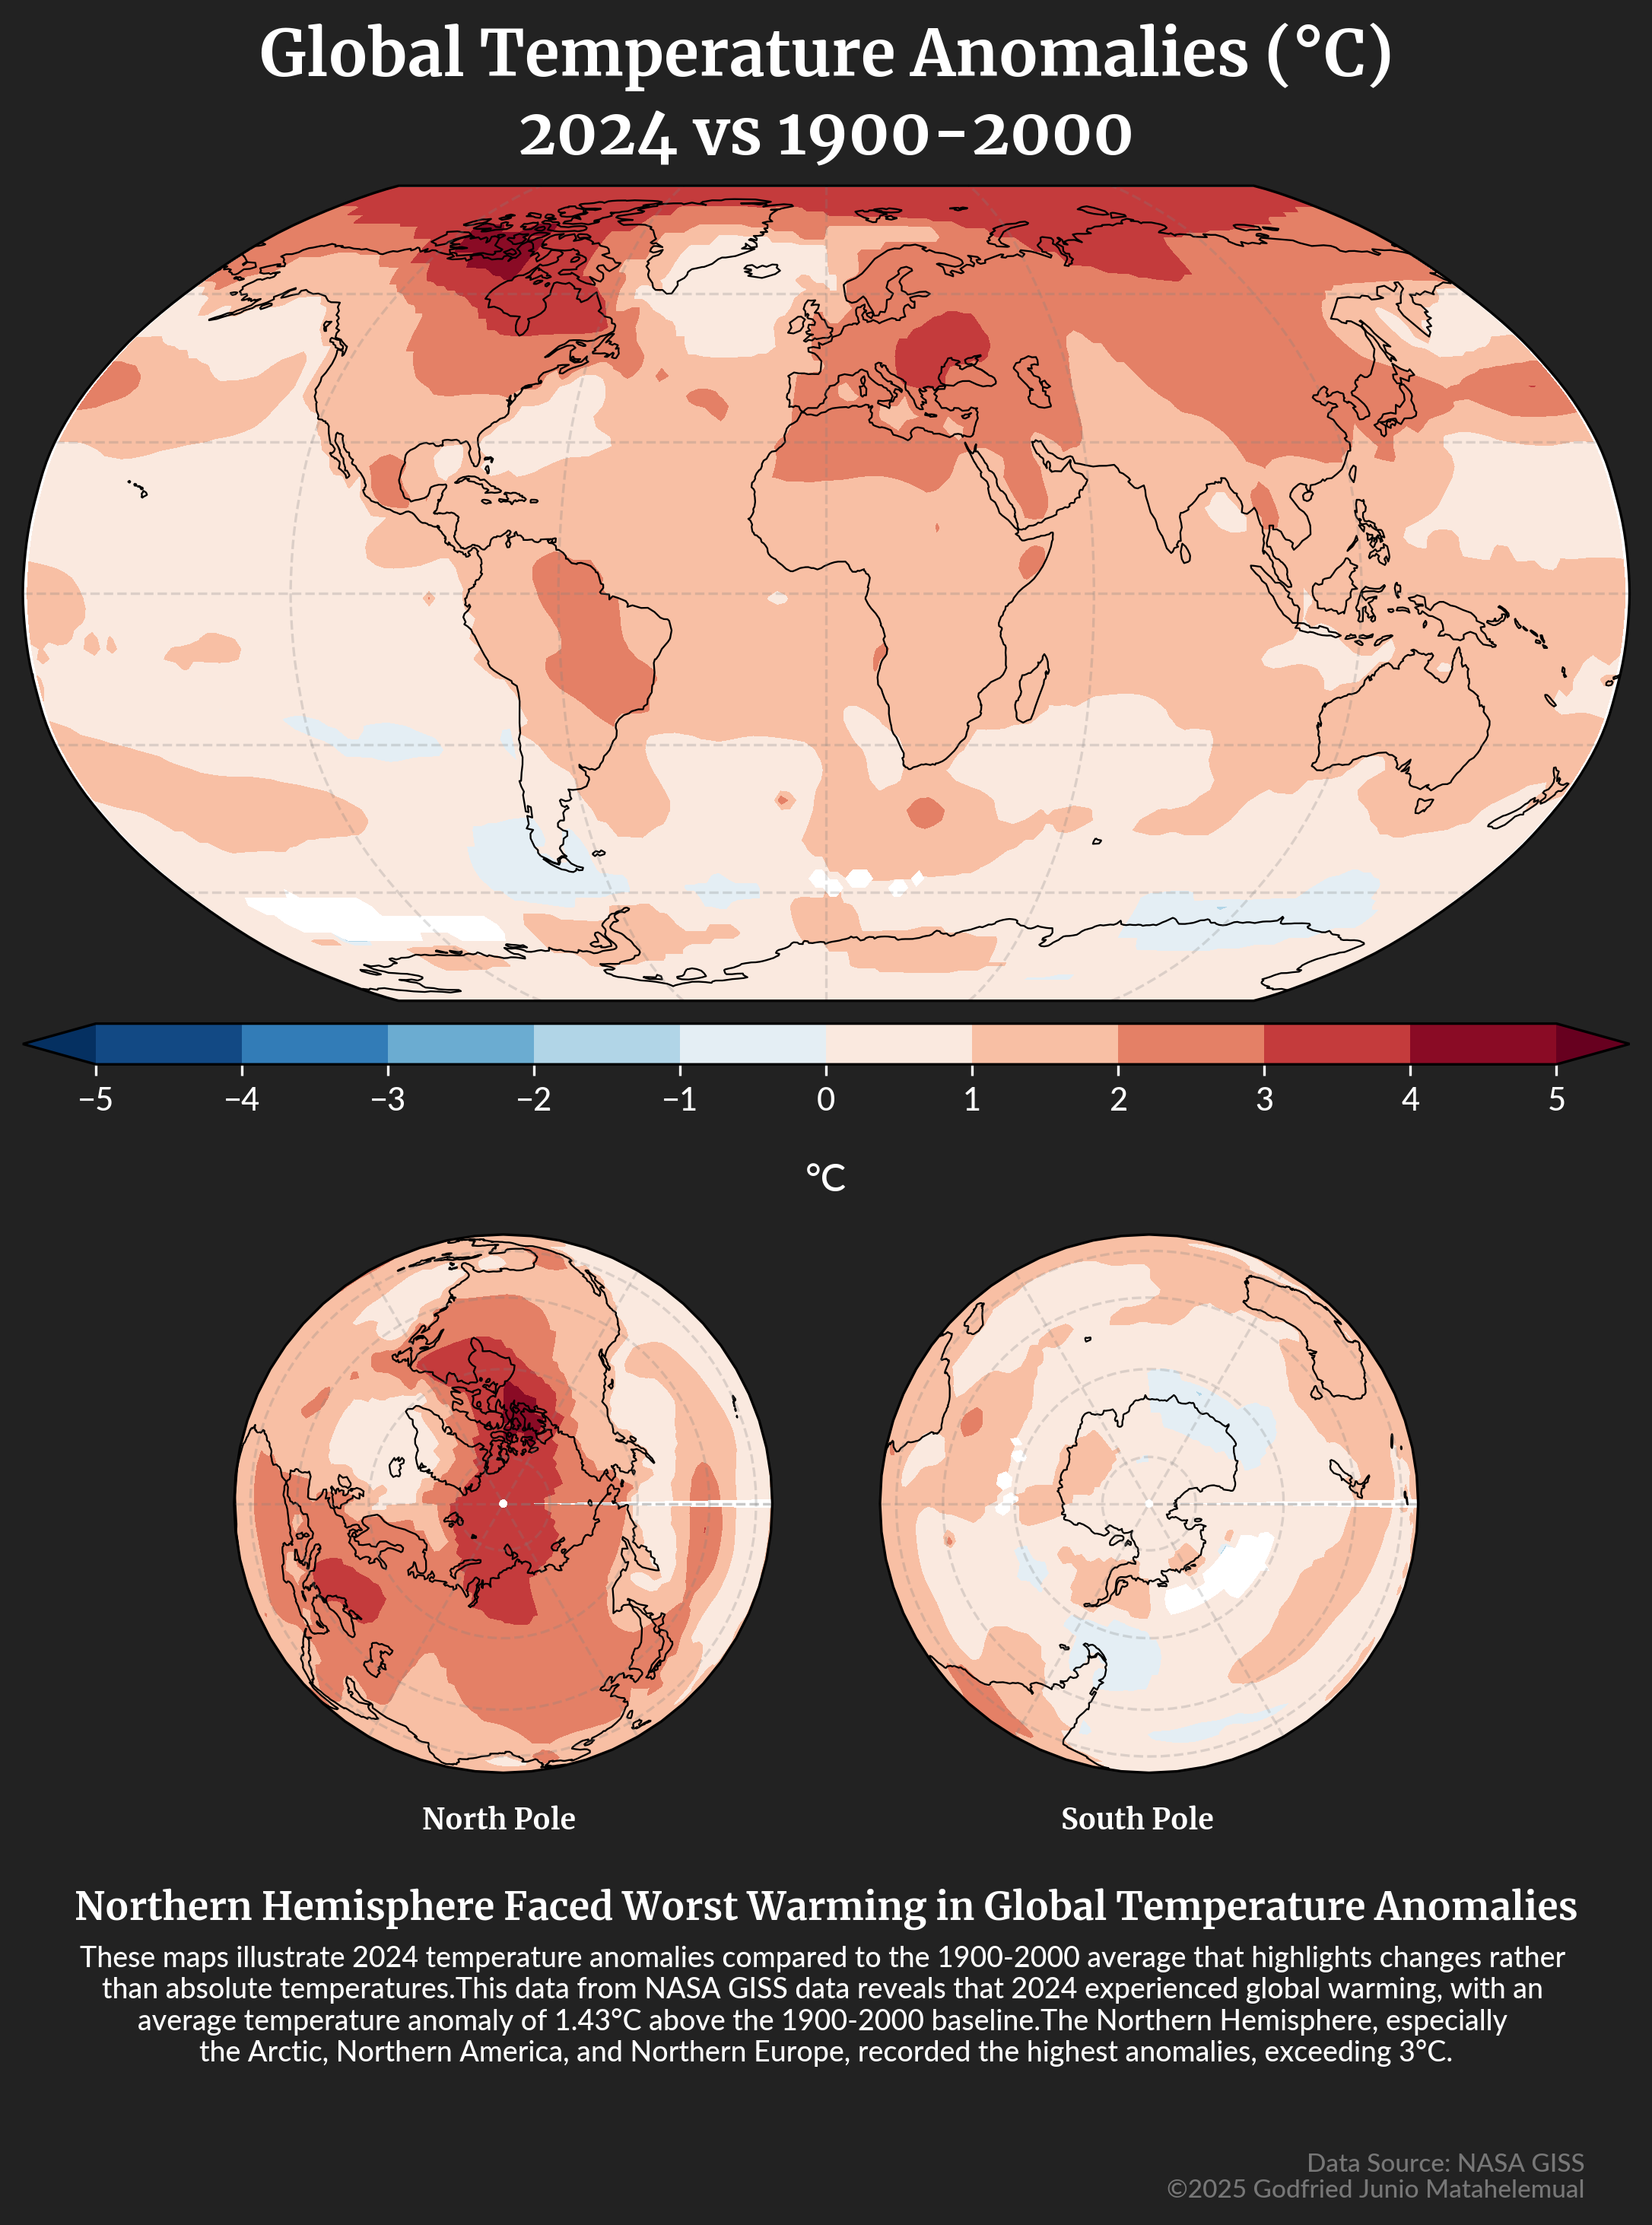

In [19]:
# Create subplots
fig = plt.figure(figsize=(14, 10), dpi=300, facecolor="#222222")
gs = GridSpec(4, 4, figure=fig, hspace=0)  # 4 columns, spaced evenly # 0 = closer to main plot

# Main plot
ax1 = fig.add_subplot(gs[0:2, :], projection=ccrs.Robinson())
contour = main_plot(ax1, ccrs.Robinson())
ax1.set_title(
    "Global Temperature Anomalies (°C)\n2024 vs 1900-2000",
    font=title_font,
    fontsize=20,
    pad=10,
    color="white"
)

# Colorbar
divider = make_axes_locatable(ax1)
cbar_ax = divider.new_vertical(size="5%", pad=0.1, pack_start=True, axes_class=plt.Axes)

fig.add_axes(cbar_ax)
cb = plt.colorbar(
    contour,
    cax=cbar_ax,
    orientation="horizontal",
    ticks=np.arange(-5, 6)
)

# Set the colorbar label and properties
cb.set_label("°C", size=12, rotation=0, labelpad=15, font=body_font, color="white")
cb.ax.tick_params(labelsize=10, colors="white")
for tick_label in cb.ax.get_xticklabels():
    tick_label.set_fontproperties(body_font)

# First subplot (North Pole in 2nd column)
ax2 = fig.add_subplot(gs[2:, 1], projection=ccrs.Orthographic(central_longitude=90, central_latitude=90))
subplot(ax2, ccrs.Orthographic(central_longitude=90, central_latitude=90))

# Second subplot (South Pole in 3rd column)
ax3 = fig.add_subplot(gs[2:, 2], projection=ccrs.Orthographic(central_longitude=90, central_latitude=-90))
subplot(ax3, ccrs.Orthographic(central_longitude=90, central_latitude=-90))

# Titles below subplots
plt.text(0.41, 0.16, "North Pole", transform=fig.transFigure, fontsize=9, font=title_font, ha="center", color="white")
plt.text(0.61, 0.16, "South Pole", transform=fig.transFigure, fontsize=9, font=title_font, ha="center", color="white")

# Add narration below the main plot
bbox = ax1.get_position()
narration_x = (bbox.x0 + bbox.x1) / 2  # Center of the main plot in figure-relative coordinates

plt.figtext(
    narration_x, 0.12,  # Use dynamically calculated x position
    "Northern Hemisphere Faced Worst Warming in Global Temperature Anomalies",
    wrap=True,
    horizontalalignment="center",
    fontsize=12,
    color="white",
    font=title_font
)
plt.figtext(
    narration_x, 0.06,  # Use dynamically calculated x position
    "These maps illustrate 2024 temperature anomalies compared to the 1900-2000 average that highlights changes rather \nthan absolute temperatures."
    "This data from NASA GISS data reveals that 2024 experienced global warming, with an \naverage temperature anomaly of 1.43°C above the 1900-2000 baseline."
    "The Northern Hemisphere, especially \nthe Arctic, Northern America, and Northern Europe, recorded the highest anomalies, exceeding 3°C.",
    wrap=True,
    horizontalalignment="center",
    fontsize=9,
    color="white",
    font=body_font
)

# Add data source
plt.figtext(
    .75, 0,
    "Data Source: NASA GISS\n©2025 Godfried Junio Matahelemual",
    wrap=True,
    horizontalalignment="right",
    fontsize=8,
    color="#777",
    font=body_font
)

plt.show()

In [20]:
# Save the plot as a PNG file with a transparent background
output_path = "temperature_anomalies_2024_dark.png"

# Ensure the figure is saved with the current specifications
fig.savefig(output_path, dpi=300, bbox_inches="tight", facecolor=fig.get_facecolor())

output_path

'temperature_anomalies_2024_dark.png'

# Reference
- https://towardsdatascience.com/assessing-global-temperature-anomaly-using-nasas-space-studies-part-ii-29e5e313a7b3

# Data Source
- https://data.giss.nasa.gov//gistemp/maps/